In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

path = "outputs/"
algo_names = ["1nn", "cart", "mlp", "nb", "svm", "random_forest"]
def load_results_from_term(term):
    results_data = {}
    for algo_name in algo_names:
        path_full = glob.glob(path + "full_" + term + "_" + algo_name + "*")[0]
        path_reduced = glob.glob(path + "reduced_" + term + "_" + algo_name + "*")[0]
        print(path_full)
        print(path_reduced)
        results_data[algo_name] = {
            "full": json.load(open(path_full)),
            "reduced": json.load(open(path_reduced))
        }
    
    return results_data



arit = load_results_from_term("arit")
print("-----------------------")
esc = load_results_from_term("esc")
print("---------------------------")
leit = load_results_from_term("leit")

outputs\full_arit_1nn_results.json
outputs\reduced_arit_1nn_results.json
outputs\full_arit_cart_results.json
outputs\reduced_arit_cart_results.json
outputs\full_arit_mlp_results.json
outputs\reduced_arit_mlp_results.json
outputs\full_arit_nb_results.json
outputs\reduced_arit_nb_results.json
outputs\full_arit_svm_results.json
outputs\reduced_arit_svm_results.json
outputs\full_arit_random_forest_results.json
outputs\reduced_arit_random_forest_results.json
-----------------------
outputs\full_esc_1nn_results.json
outputs\reduced_esc_1nn_results.json
outputs\full_esc_cart_results.json
outputs\reduced_esc_cart_results.json
outputs\full_esc_mlp_results.json
outputs\reduced_esc_mlp_results.json
outputs\full_esc_nb_results.json
outputs\reduced_esc_nb_results.json
outputs\full_esc_svm_results.json
outputs\reduced_esc_svm_results.json
outputs\full_esc_random_forest_results.json
outputs\reduced_esc_random_forest_results.json
---------------------------
outputs\full_leit_1nn_results.json
outputs\r

In [ ]:
def get_score_per_class(dataset, metric):
    pass

[85.8658, 78.8961, 79.0043, 75.3247, 73.5281, 85.7792]
[90.474, 90.0974, 85.1255, 70.0693, 73.0736, 91.8918]
[56.5, 44.0, 53.5, 53.0, 72.5, 56.5]
[51.475, 46.625, 51.3, 53.175, 72.5, 52.1]


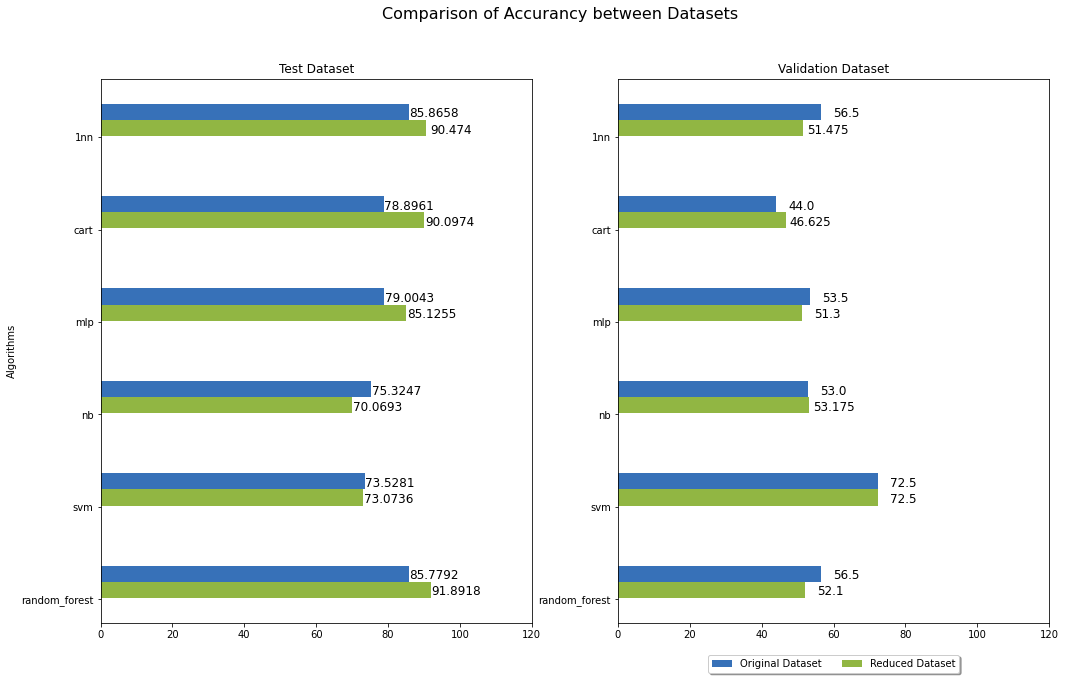

In [2]:
def get_accuracy_per_test(test_result: dict, score_name: str):
    results = []
    counter = 0
    for key in test_result.keys():
        if key.startswith('i'):
            result = test_result[key][score_name]["accuracy"]
            results.append(result)
            counter+=1

    return sum(results) / counter

def autolabel(ax, rects):
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ypos = rect.get_y() + height/2
        ax.text(width + 7.0, ypos - 0.11, width, ha='center', va='bottom', rotation=0, fontsize=12) 

# acuracia base de treino
full_accuracy_train = [round(get_accuracy_per_test(arit[algo_name]["full"], "scores")*100, 4) for algo_name in algo_names]
reduced_accuracy_train = [round(get_accuracy_per_test(arit[algo_name]["reduced"], "scores")*100, 4) for algo_name in algo_names]
print(full_accuracy_train)
print(reduced_accuracy_train)


# acuracias basse de validacao
full_accuracy_valid = [round(get_accuracy_per_test(arit[algo_name]["full"], "valid_scores")*100, 4) for algo_name in algo_names]
reduced_accuracy_valid = [round(get_accuracy_per_test(arit[algo_name]["reduced"], "valid_scores")*100, 4)for algo_name in algo_names]
print(full_accuracy_valid)
print(reduced_accuracy_valid)



#Valores dos agrupamentos
Borro_precision = [49.3, 29.5, 51.5, 89.1, 75.6, 28.3, 53.9]
Leijoto_precision = [62.1, 73.5, 62.1, 78.6, 75.5, 76.7, 71.4]
Santos_precision  = [69.7, 65.3, 96.2, 100.0, 69.8, 86.3, 78.4]
Metodologia_precision  = [65.0, 73.6, 80.0, 87.0,  74.5, 83.9, 77.3]

#Valores dos agrupamentos
Borro_recall = [38.5, 24.0, 42.0, 62.8, 36.0, 69.1, 45.4]
Leijoto_recall = [72.5, 65.8, 60.0, 61.1, 70.2, 75.8, 67.6]
Santos_recall = [84.6, 60.3, 75.4, 62.5, 66.1, 85.2, 72.4]
Metodologia_recall = [79.7, 68.0, 50.0, 64.5, 69.1, 87.0, 69.7]

#Valores dos agrupamentos
Borro_fmeasure = [43.2, 26.5, 46.3, 73.7, 48.8, 40.1, 46.4]
Leijoto_fmeasure = [66.9, 69.4, 61.0, 68.8, 72.7, 76.3, 69.2]
Santos_fmeasure = [76.4, 62.7, 82.1, 71.4, 67.9, 85.7, 74.4]
Metodologia_fmeasure = [72.0, 71.1, 61.5, 74.1, 71.7, 85.5, 72.7]

#Definindo o numero de colunas e o numero de agrupamentos
number_columns = len(algo_names)
number_groups = 2

# Definindo a largura das barras
barWidth = 0.21

#Espaçamento entre barras
espacamentoEntreBarras = 0.00

#espaçamento de um grupo no outro
espacamentoEntreGrupos = 1.2

# Aumentando o gráfico
plt.rcParams['figure.figsize'] = (17,10)

# fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3)
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)

# Definindo a posição das barras
r1 = [(x * espacamentoEntreGrupos + espacamentoEntreBarras) *-1 for x in range(number_columns)]
r2 = [(x - barWidth - espacamentoEntreBarras) for x in r1]
# r3 = [x - barWidth - espacamentoEntreBarras for x in r2]
# r4 = [x - barWidth - espacamentoEntreBarras for x in r3]
 
# Criando as barras
label1 = ax0.barh(r1, full_accuracy_train, barWidth, color='#3771B8', label='Original Dataset')
label2 = ax0.barh(r2, reduced_accuracy_train, barWidth, color='#91B643', label='Reduced Dataset')
# label3 = ax0.barh(r3, Santos_precision, barWidth, color='#AF3330', label='Santos (2016)')
# label4 = ax0.barh(r4, Metodologia_precision, barWidth, color='#3771B8', label='Metodologia Proposta')

ax0.set_xticks(np.arange(0, 140, 20))
ax0.set_yticks([r - barWidth - espacamentoEntreBarras - 0.12 for r in r1])
# ax0.set_yticklabels(['Tra.', 'Oxi.', 'Lia.', 'Lig.', 'Iso.', 'Hid.', 'Ave.'])
ax0.set_yticklabels(algo_names)
ax0.set_title('Test Dataset')
ax0.set_ylabel('Algorithms')

autolabel(ax0, label1)
autolabel(ax0, label2)
# autolabel(ax0, label3)
# autolabel(ax0, label4)


# Criando as barras
label1 = ax1.barh(r1, full_accuracy_valid, barWidth, color='#3771B8', label='Original Dataset')
label2 = ax1.barh(r2, reduced_accuracy_valid, barWidth, color='#91B643', label='Reduced Dataset')
# label3 = ax1.barh(r3, Santos_recall, barWidth, color='#AF3330', label='Santos (2016)')
# label4 = ax1.barh(r4, Metodologia_recall, barWidth, color='#3771B8', label='Metodologia Proposta')

ax1.set_xticks(np.arange(0, 140, 20))
ax1.set_yticks([r - barWidth - espacamentoEntreBarras - 0.12 for r in r1])
ax1.set_yticklabels(algo_names)
ax1.set_title('Validation Dataset')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)

autolabel(ax1, label1)
autolabel(ax1, label2)
# autolabel(ax1, label3)
# autolabel(ax1, label4)


# Criando as barras
# label1 = ax2.barh(r1, Borro_fmeasure, barWidth, color='#704F97', label='Borro et al (2006)')
# label2 = ax2.barh(r2, Leijoto_fmeasure, barWidth, color='#91B643', label='Leijôto (2014)')
# label3 = ax2.barh(r3, Santos_fmeasure, barWidth, color='#AF3330', label='Santos (2016)')
# label4 = ax2.barh(r4, Metodologia_fmeasure, barWidth, color='#3771B8', label='Metodologia Proposta')

# ax2.set_xticks(np.arange(0, 140, 20))
# ax2.set_yticks([r - barWidth - espacamentoEntreBarras - 0.12 for r in r1])
# ax2.set_yticklabels(['Tra.', 'Oxi.', 'Lia.', 'Lig.', 'Iso.', 'Hid.', 'Ave.'])
# ax2.set_title('F-Measure')

# autolabel(ax2, label1)
# autolabel(ax2, label2)
# autolabel(ax2, label3)z
# autolabel(ax2, label4) 

plt.suptitle('Comparison of Accurancy between Datasets', fontsize=16)
plt.show()